# Scikit image

La libreria scikit image è costituita da una collezione di algoritmi per l'image processing.

- trasformazioni
- filtri
- ecc.

In [6]:
# import delle librerie
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = 'data'

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

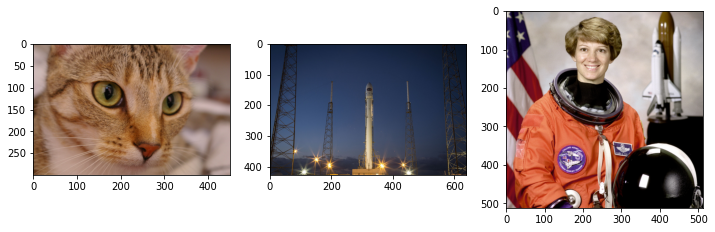

In [7]:
# immagini di esempio
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()
img2 = data.astronaut()

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(img0)
plt.subplot(132)
plt.imshow(img1)
plt.subplot(133)
plt.imshow(img2)

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


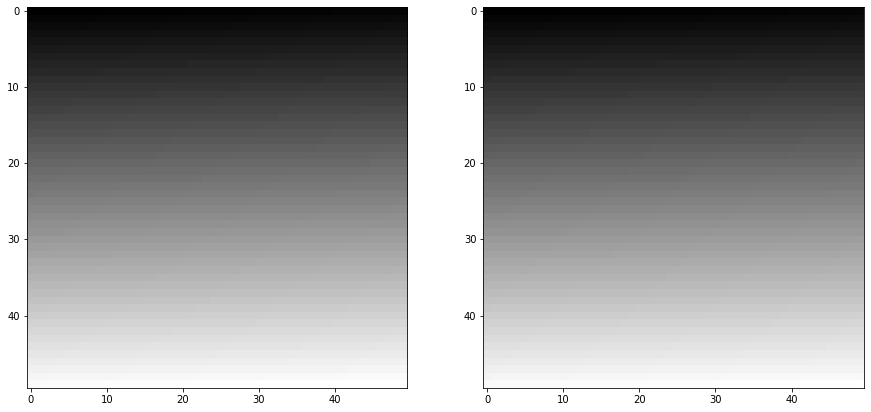

In [8]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray')

In [9]:
# convert between format [0, 255] and [0, 1]
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


<class 'numpy.ndarray'>
uint8
(133, 200, 3)
0 255


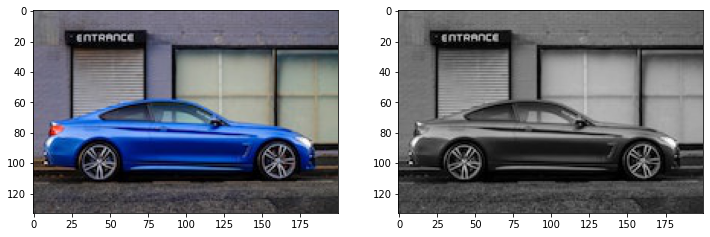

In [10]:
# loading image file
from skimage import io, color

image = io.imread(myResourcePath('car.jpg'))

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

gray = color.rgb2gray(image)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(gray, cmap='gray')


In [11]:
# collection of images
ic = io.ImageCollection(os.path.join(IMGSRC, '*.jpg'))

print(f'Type: {type(ic)}')

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['data/car.jpg',
 'data/figure_geometriche.jpg',
 'data/google_android.jpg',
 'data/logo.jpg',
 'data/sudokuoriginal.jpg',
 'data/track.jpg']

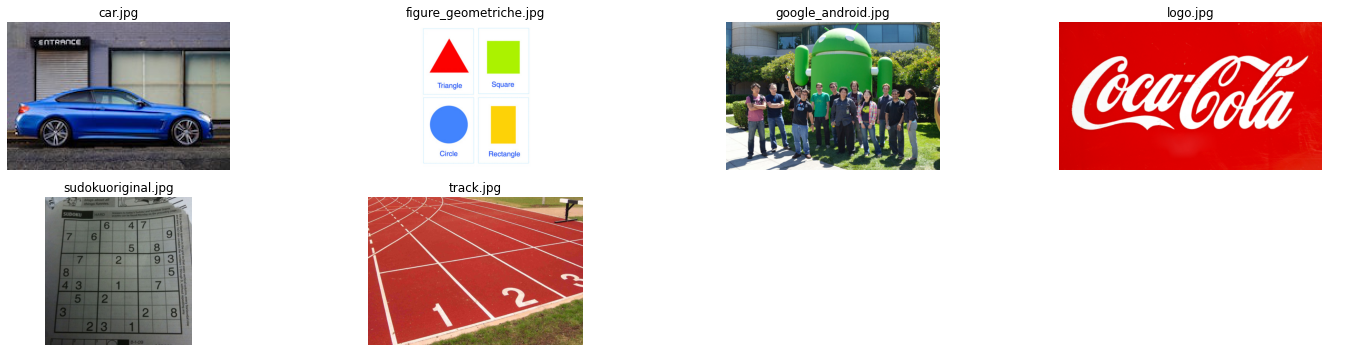

In [12]:
f, axes = plt.subplots(nrows=2, ncols=len(ic) // 2 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

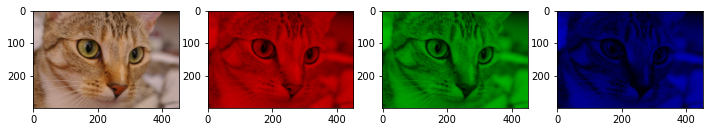

In [13]:
# thanks to https://github.com/scikit-image/skimage-tutorials
import skdemo

image = data.chelsea()

red_image = np.zeros_like(image)
green_image = np.zeros_like(image)
blue_image = np.zeros_like(image)

red_image[:, :, 0] = image[:, : , 0]
green_image[:, : , 1] = image[:, : , 1]
blue_image[:, :, 2] = image[:, : , 2]


plt.figure(figsize=(12, 8))
plt.subplot(141)
plt.imshow(image)
plt.subplot(142)
plt.imshow(red_image)
plt.subplot(143)
plt.imshow(green_image)
plt.subplot(144)
plt.imshow(blue_image)

In [14]:
# nella libreria sono disponibili altri metodi di utilità
skdemo.imshow_with_histogram?

Signature: skdemo.imshow_with_histogram(image, **kwargs)
Docstring:
Plot an image side-by-side with its histogram.

- Plot the image next to the histogram
- Plot each RGB channel separately (if input is color)
- Automatically flatten channels
- Select reasonable bins based on the image's dtype

See `plot_histogram` for information on how the histogram is plotted.
File:      ~/Documents/pynotebooks/lezioni/lezione1/skdemo/_skdemo.py
Type:      function


(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

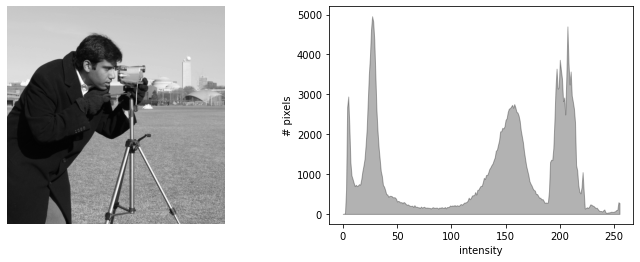

In [15]:
skdemo.imshow_with_histogram(data.camera())

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

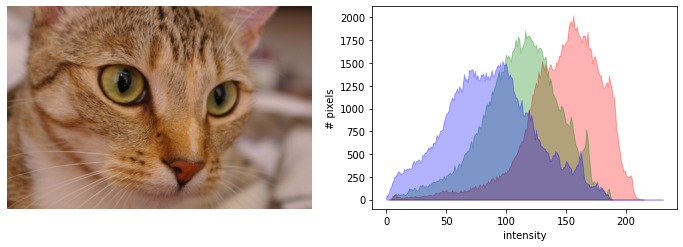

In [16]:
skdemo.imshow_with_histogram(data.chelsea())

# Trasformazioni di base

Esempi di roto-traslazioni

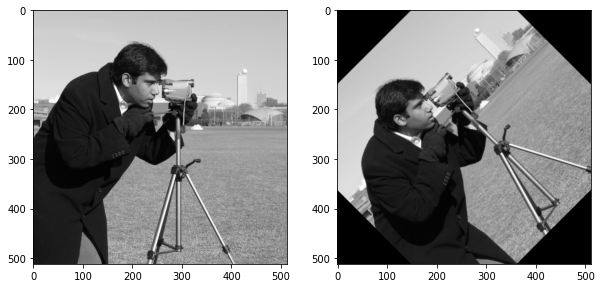

In [17]:
from skimage import transform

image = data.camera()
rotated = transform.rotate(image, 45)

skdemo.imshow_all(image, rotated)

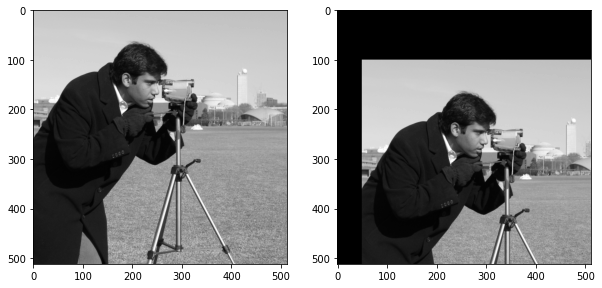

In [18]:
# traslazione
from skimage.transform import SimilarityTransform

# spostamento sugli assi x,y
tform = SimilarityTransform(translation=(-50, -100))
warped = transform.warp(image, tform)

skdemo.imshow_all(image, warped)

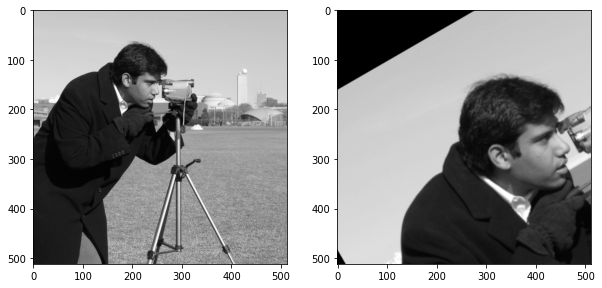

In [19]:
# scale -> float, Scale factor.
# rotation -> float, Rotation angle in counter-clockwise direction as radians.
# translation(tx, ty) -> array, x, y translation parameters.

tform = SimilarityTransform(scale=.5, translation=(120, -70), rotation=np.deg2rad(30))
warped = transform.warp(image, tform)

skdemo.imshow_all(image, warped)

# Skimage filters

Il package filters contiene alcune funzioni di utilità

suggested threashold is 102


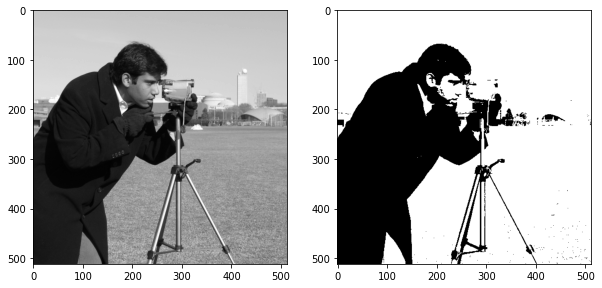

In [20]:
from skimage import filters

# i filtri di threasholding sono numerosi, ne vediamo uno che funziona per immagini in scala di grigi
image = data.camera()
threshold = filters.threshold_otsu(image)
print(f'suggested threashold is {threshold}')

skdemo.imshow_all(image, image > threshold)

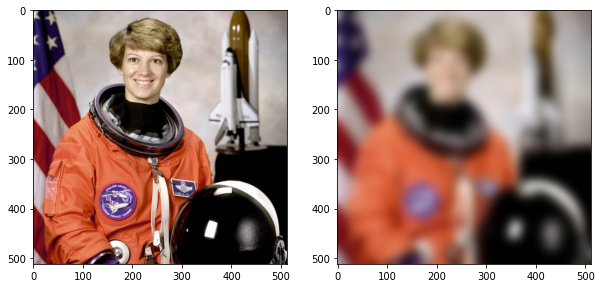

In [21]:
# gaussian filter
image = data.astronaut()

gaussian_result = filters.gaussian(image, sigma=10, multichannel=True)

skdemo.imshow_all(image, gaussian_result)

# Edge detection

Esempi di edge detection utilizzando il filtro sobel

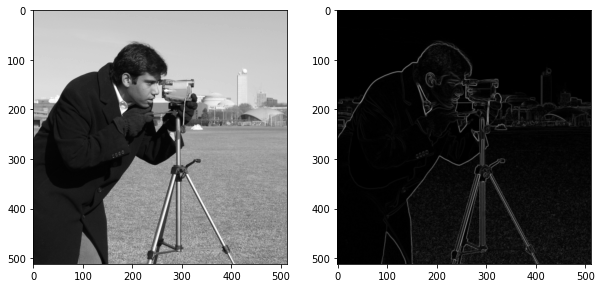

In [22]:
# esempio con immagine 2D
pixelated = data.camera()
pixelated_gradient = filters.sobel(pixelated)
skdemo.imshow_all(pixelated, pixelated_gradient)

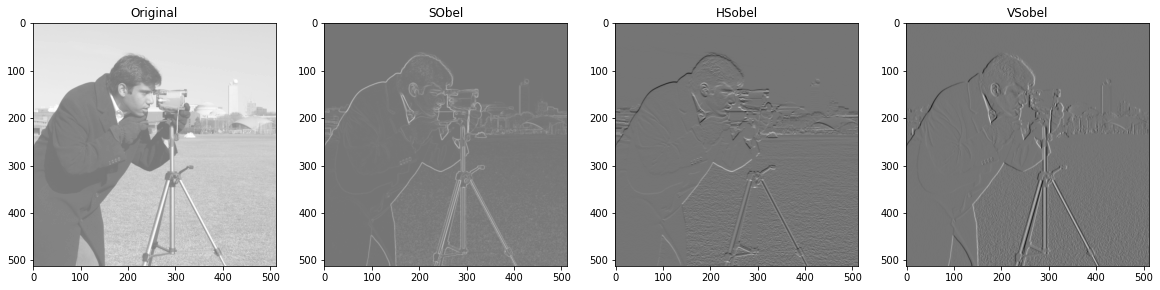

In [23]:
# ma il filtro sobel può essere applicato solo in una direzione

h_result = filters.sobel_h(pixelated)
v_result = filters.sobel_v(pixelated)
skdemo.imshow_all(pixelated, pixelated_gradient, h_result, v_result, 
                  titles=('Original', 'SObel', 'HSobel', 'VSobel'))

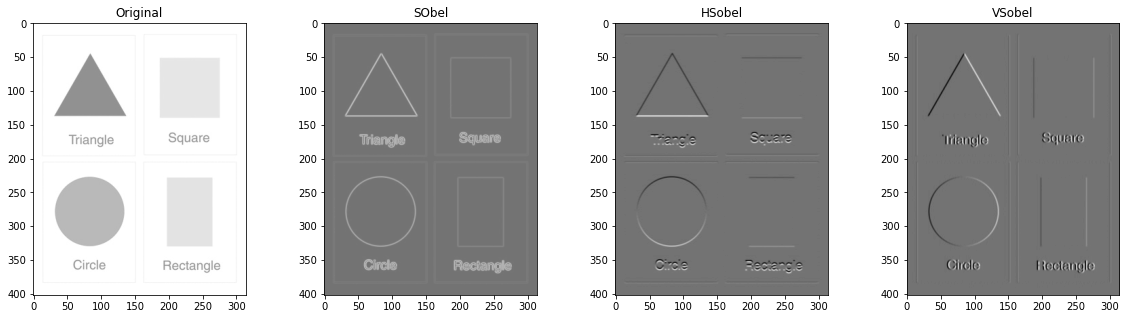

In [24]:
pixelated = io.imread(myResourcePath('figure_geometriche.jpg'))
pixelated = color.rgb2gray(pixelated)

pixelated_gradient = filters.sobel(pixelated)
h_result = filters.sobel_h(pixelated)
v_result = filters.sobel_v(pixelated)
skdemo.imshow_all(pixelated, pixelated_gradient, h_result, v_result, 
                  titles=('Original', 'SObel', 'HSobel', 'VSobel'))

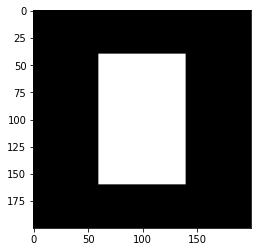

In [25]:
# Vediamo un esempio più semplice

simpleimg = np.zeros((200,200))
simpleimg[40:-40,60:-60] = 1

plt.imshow(simpleimg, cmap='gray')

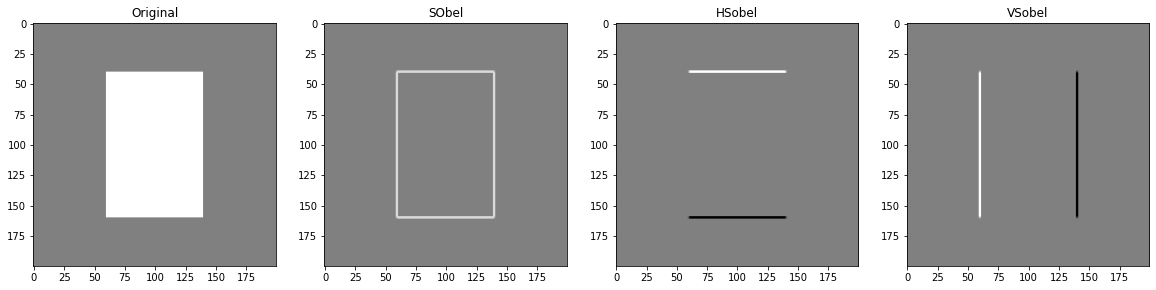

In [26]:
pixelated_gradient = filters.sobel(simpleimg)
h_result = filters.sobel_h(simpleimg)
v_result = filters.sobel_v(simpleimg)
skdemo.imshow_all(simpleimg, pixelated_gradient, h_result, v_result, 
                  titles=('Original', 'SObel', 'HSobel', 'VSobel'))

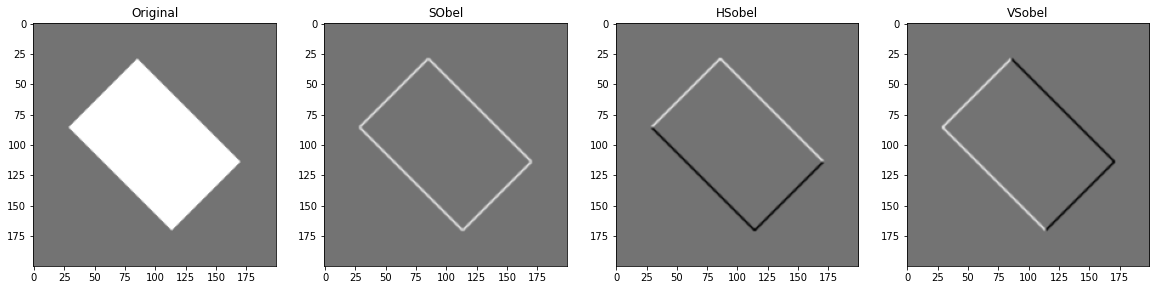

In [27]:
# se ruotiamo l'immagine?

pixelated = transform.rotate(simpleimg, 45)

pixelated_gradient = filters.sobel(pixelated)
h_result = filters.sobel_h(pixelated)
v_result = filters.sobel_v(pixelated)
skdemo.imshow_all(pixelated, pixelated_gradient, h_result, v_result, 
                  titles=('Original', 'SObel', 'HSobel', 'VSobel'))


In [28]:
from skimage import data
import skimage.feature

image = data.chelsea()

out = skimage.feature.hog(image, feature_vector=False)
out.shape

(35, 54, 3, 3, 9)

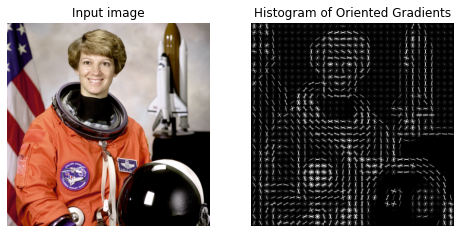

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()